In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load the Data

In [4]:
file_name = 'stock.csv'
data = pd.read_csv(file_name,encoding = "ISO-8859-1")

# Prepare the Data

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change
0,2-Jan-09,902.99,931.80,934.73,899.35,4048270080,NaN
1,5-Jan-09,929.17,927.45,936.63,919.53,5413910016,-0.004679
2,6-Jan-09,931.17,934.70,943.85,927.28,5392620032,0.007787
3,7-Jan-09,927.45,906.65,927.45,902.37,4704940032,-0.030469
4,8-Jan-09,905.73,909.73,910.00,896.81,4991549952,0.003391


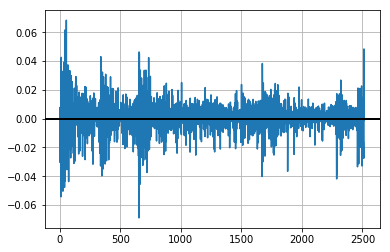

In [5]:
close = data['Close Price']
data['log_change'] = np.log(close) - np.log(close.shift(1))
data.log_change.plot(grid=True).axhline(y=0, color='black', lw=2)
data.head()

In [6]:
def mapping(x):
    if x>0:
        return 1
    else:
        return 0
data['price_change']=data['log_change'].apply(mapping)
data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change,price_change
0,2-Jan-09,902.99,931.80,934.73,899.35,4048270080,NaN,0
1,5-Jan-09,929.17,927.45,936.63,919.53,5413910016,-0.004679,0
2,6-Jan-09,931.17,934.70,943.85,927.28,5392620032,0.007787,1
3,7-Jan-09,927.45,906.65,927.45,902.37,4704940032,-0.030469,0
4,8-Jan-09,905.73,909.73,910.00,896.81,4991549952,0.003391,1


轉換成datetime

In [7]:
data['Date']=pd.to_datetime(data['Date'])
print(data.dtypes)

Date            datetime64[ns]
Open Price             float64
Close Price            float64
High Price             float64
Low Price              float64
Volume                   int64
log_change             float64
price_change             int64
dtype: object


將index轉為時間

In [8]:
data=data.set_index(data['Date'],drop=True)
del data['Date']
data.head()

,Open Price,Close Price,High Price,Low Price,Volume,log_change,price_change
Date,,,,,,,
2009-01-02,902.99,931.80,934.73,899.35,4048270080,NaN,0
2009-01-05,929.17,927.45,936.63,919.53,5413910016,-0.004679,0
2009-01-06,931.17,934.70,943.85,927.28,5392620032,0.007787,1
2009-01-07,927.45,906.65,927.45,902.37,4704940032,-0.030469,0
2009-01-08,905.73,909.73,910.00,896.81,4991549952,0.003391,1


In [9]:
data.index=pd.to_datetime(data.index,format='%Y-%m-%d')#將index轉為時間datetime
data.head()

,Open Price,Close Price,High Price,Low Price,Volume,log_change,price_change
Date,,,,,,,
2009-01-02,902.99,931.80,934.73,899.35,4048270080,NaN,0
2009-01-05,929.17,927.45,936.63,919.53,5413910016,-0.004679,0
2009-01-06,931.17,934.70,943.85,927.28,5392620032,0.007787,1
2009-01-07,927.45,906.65,927.45,902.37,4704940032,-0.030469,0
2009-01-08,905.73,909.73,910.00,896.81,4991549952,0.003391,1


create two new variables, train and test including the correct data points

In [10]:
train = data[data.index.year<=2017].drop(columns=['log_change'])
test = data[data.index.year>2017].drop(columns=['log_change'])

In the begining, we choose two features to do the classification task.

In [11]:
train = train.drop(columns=['High Price','Low Price','Volume'])
test = test.drop(columns=['High Price','Low Price','Volume'])

In [12]:
x_train = train.loc[:,train.columns !='price_change']
y_train = train['price_change']
x_test = test.loc[:,test.columns !='price_change']
y_test = test['price_change']

In [13]:
x_train.head()

,Open Price,Close Price
Date,,
2009-01-02,902.99,931.80
2009-01-05,929.17,927.45
2009-01-06,931.17,934.70
2009-01-07,927.45,906.65
2009-01-08,905.73,909.73


In [14]:
x_test.head()

,Open Price,Close Price
Date,,
2018-01-02,2683.73,2695.81
2018-01-03,2697.85,2713.06
2018-01-04,2719.31,2723.99
2018-01-05,2731.33,2743.15
2018-01-08,2742.67,2747.71


# Import package for svm

In [15]:
from sklearn.preprocessing import StandardScaler

# Standardization

In [16]:
ss = StandardScaler()
ss.fit(x_train)

x_train_std = ss.transform(x_train)
x_test_std = ss.transform(x_test)

# Import svm model in the sklearn

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [18]:
penalty = 0.05

In [19]:
svm = SVC(C=penalty,kernel='linear')
svm.fit(x_train,y_train.values)

acc_train = accuracy_score(y_train.values, svm.predict(x_train)) * 100
acc_test = accuracy_score(y_test.values, svm.predict(x_test)) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 93.77 %, Test accuracy = 82.94 %


In [20]:
penalty = 10

In [21]:
svm = SVC(C=penalty,kernel='linear')
svm.fit(x_train,y_train.values)

acc_train = accuracy_score(y_train.values, svm.predict(x_train)) * 100
acc_test = accuracy_score(y_test.values, svm.predict(x_test)) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 10.00, Train accuracy = 93.86 %, Test accuracy = 83.33 %


In [23]:
svm.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)